# Определенные интегралы

Подмодуль [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) позволяет приближенно вычислять значение определенных интегралов

## Одномерные
Функция [scipy.integrate.quad](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad) позволяет проинтегрировать функцию $f: \mathbb{R} -> \mathbb{R}$. Вызов функции `quad(f, a, b)` приближенно находит значение интеграла

$$
\int_a^b f(x) dx.
$$

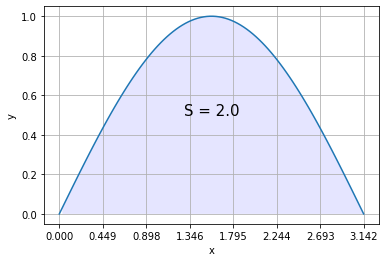

In [23]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt


f = np.sin
a, b = 0, np.pi
I, _ = integrate.quad(f, 0, np.pi)
x = np.linspace(0, np.pi, 100)
y = f(x)

plt.plot(x, y)
plt.fill_between(x, np.zeros(100), y, where=(y>0), facecolor='blue', alpha=0.10)
plt.xticks(np.linspace(0, np.pi, 8))
plt.text(np.pi/2, 0.5, f"S = {I}", fontdict={"size":15, "ha": "center"})
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

Параметры $a$ и $b$ могут принимать значения `-inf` и `+inf`.

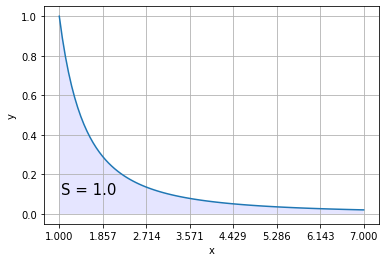

In [42]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt


def f(x):
    return 1. / (x ** 2)


a, b = 1, np.inf
I, _ = integrate.quad(f, a, b)

x = np.linspace(a, 7, 100)
y = f(x)
plt.plot(x, y)
plt.fill_between(x, np.zeros(100), y, where=(y>0), facecolor='blue', alpha=0.10)
plt.xticks(np.linspace(a, 7, 8))
plt.text(np.pi/2, 0.1, f"S = {I}", fontdict={"size":15, "ha": "center"})
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

## Двухмерные

Функция [scipy.integrate.dblquad](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.dblquad.html#scipy.integrate.dblquad) позволяет вычислять интегралы вида

$$
\int_a^b \int_{g(x)}^{h(x)} f(x, y) dx dy.
$$

В качестве примера возьмём интеграл функции $f = \sqrt{x^2 + y^2}$ в области $D$ совпадающей с кругом единичного радиуса с центром в начале:

$$
\int_{-1}^{1} \int_{-\sqrt{1 - x^2}}^{\sqrt{1-x^2}} \sqrt{x^2 + y^2} dx dy = 2 \pi \int_{0}^1 r^2 dr = \frac{2 \pi}{3}.
$$

Вычисленное значение интеграла: 2.0943951023924106, точное значение: 2.0943951023931953.


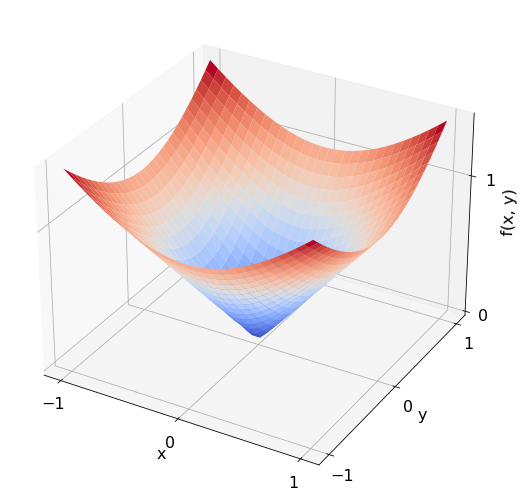

In [4]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams.update({"font.size": 16})

def h(x):
    return np.sqrt(1 - x**2)

def g(x):
    return -h(x)

def f(x, y):
    return np.sqrt(x**2 + y**2)

a, b = -1, 1
I, _ = integrate.dblquad(f, -1, 1, g, h)
print(f"Вычисленное значение интеграла: {I}, точное значение: {2 * np.pi / 3}.")

x = np.linspace(a, b, 30)
y = np.linspace(a, b, 30)
x, y = np.meshgrid(x, y)
z = f(x, y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_size_inches(10, 9)

surf = ax.plot_surface(x, y, z, cmap="coolwarm")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([0, 1])
plt.show()
